<a href="https://colab.research.google.com/github/Hend-Khaled-Aly/ITI_NLP/blob/main/Pytorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import numpy as np
import seaborn as sns
from torch import nn
from torch.utils.data import Dataset , DataLoader
from tqdm.autonotebook import tqdm

<ipython-input-11-a6c891793b3d>:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


<Axes: >

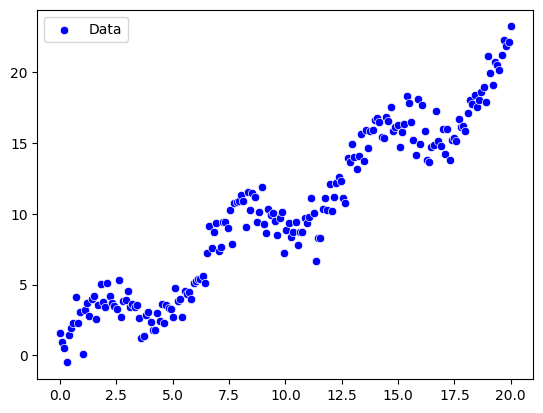

In [3]:
torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [4]:
class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [5]:
df = Simple1DRegressionDataset(X,y)
df[0]

(tensor([0.]), tensor([1.6016]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)
data_point = next(iter(training_loader))
data_point

[tensor([[8.8442]]), tensor([[10.1046]])]

In [7]:
in_features = 1
out_features = 1

In [8]:
model_2 = nn.Sequential(
    nn.Linear(1, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
    )

In [9]:
loss_fn = nn.MSELoss()

In [10]:
optimizer = torch.optim.Adam(params=model_2.parameters(),lr=0.06)

In [12]:
def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)


In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=40
                )

Epochs:   0%|          | 0/40 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

68.89828491210938
94.02141761779785
211.33382606506348
218.30837488174438
273.0890488624573
422.0890488624573
442.66877794265747
444.33297777175903
481.8169560432434
659.0902409553528
705.0241169929504
751.7117466926575
752.6563659310341
759.5566249489784
766.3635368943214
972.8779717087746
1281.506267607212
1286.1100822091103
1680.8936515450478
1686.9260163903236
1784.7847047448158
1793.6358781456947
2180.402540743351
2186.2665320038795
2348.5848150849342
2351.267469704151
2470.9707396626472
2521.9241583943367
2759.387338936329
2824.6856024861336
2894.4979117512703
2992.8653586506844
3045.72374945879
3214.772348701954
3218.8361318707466
3227.603361904621
3228.9319674372673
3236.2889801859856
3241.5551802515984
3241.7501755207777
3242.6353980749846
3254.5857507437468
3255.7235665768385
3257.4228095263243
3310.8317450731993
3360.1034468859434
3368.9240426272154
3376.4283856600523
3410.1336240023375
3432.6379155367613
3449.770531579852
3540.2441567629576
3547.580349370837
3548.2707310169

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

44.12190628051758
270.0250587463379
462.052188873291
657.567081451416
691.630313873291
863.5527992248535
1084.965534210205
1241.0816688537598
1241.1668350324035
1241.3821077868342
1241.4549381434917
1415.8963749110699
1418.2833435237408
1422.2744145095348
1440.771515339613
1477.4529156386852
1638.8792004287243
1640.3201379477978
1653.2963800132275
2014.77257630229
2192.332894295454
2354.1140527427197
2357.4656214416027
2538.053100079298
2672.8341822326183
2696.6114306151867
2988.125926464796
3015.217921704054
3167.2488207519054
3207.591777294874
3338.459407299757
3338.545368514955
3370.685089431703
3372.556268297136
3514.8081451281905
3526.3308349475265
3536.9480672702193
3554.7926431521773
3572.9294076785445
3604.1911264285445
3628.8257356509566
3717.6950746402144
3958.0191102847457
4026.323858819902
4068.328070245683
4214.921850763261
4236.171858392656
4236.640894524753
4240.545423142612
4271.490701310337
4397.848771683872
4400.77555333823
4400.8651206716895
4658.630471013486
4971.19

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.738394260406494
122.76838541030884
196.2642731666565
200.84124851226807
275.4820032119751
303.8021402359009
314.13695430755615
377.84027004241943
385.44501209259033
399.49699306488037
405.2945580482483
409.8285279273987
602.4742798805237
805.5630707740784
819.3564190864563
903.3800778388977
999.5025143623352
1002.6877174377441
1055.463077545166
1063.0135526657104
1073.126148223877
1156.398281097412
1169.5255756378174
1173.1683435440063
1192.4088506698608
1192.478677868843
1205.8945084810257
1221.9425107240677
1232.3007766008377
1503.0322219133377
1513.3473454713821
1516.2840715646744
1521.3818360567093
1532.9307271242142
1538.4861532449722
1555.718451142311
1570.593456864357
1790.0913511514664
1799.286813378334
1810.1267076730728
1910.2807298898697
1914.23381960392
1993.0782486200333
2000.0871769189835
2003.4059730768204
2107.9388023614883
2124.312888741493
2191.3602138757706
2200.1520792245865
2266.2774378061295
2268.3425253629684
2379.3598135709763
2451.8456686735153
2645.109050631

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.455596923828125
91.04823303222656
152.27657318115234
152.39474314451218
188.08630579710007
204.18927019834518
298.8959581255913
303.3194481730461
304.05917060375214
304.3466672897339
341.6741361618042
388.8370771408081
390.4242571592331
428.5087527036667
452.1231402158737
536.151536822319
564.0589007139206
565.5312353372574
567.695387005806
588.6384373903275
610.6142312288284
632.8391267061234
637.0141845941544
637.4823537766933
638.8453154265881
690.2838682830334
700.4707684218884
753.7590450942516
775.529228657484
835.5127300918102
869.560821980238
894.7471909224987
931.941732853651
992.0159783065319
998.0925235450268
1009.843729943037
1010.032471075654
1048.9373210817575
1049.6871336847544
1050.0689115673304
1070.067671790719
1094.4185037761927
1130.8014307171106
1135.6512999683619
1201.4215560108423
1310.677812114358
1425.3731093555689
1477.8150420337915
1751.3220610767603
1821.9111876636744
1826.7266078144312
1946.1071009784937
2020.4964137226343
2025.3610253483057
2069.2629418

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.0099711418151855
93.7029185295105
101.4893069267273
106.64036464691162
133.7630796432495
154.36080074310303
189.48889827728271
231.936598777771
250.3109827041626
256.99686193466187
278.4185137748718
331.3368754386902
345.81994009017944
365.55550146102905
393.37156438827515
393.6502002477646
394.0408538579941
394.71847635507584
394.8320388570428
423.21168706566095
493.70499608665705
544.0745601430535
587.36404607445
621.9228496327996
625.3671571984887
629.4603373780847
636.7991249337792
638.5187959447503
640.981287933886
647.145534016192
647.5104803219438
647.8361632302403
650.4868585541844
651.0332816913724
651.058823691681
708.7773371804506
709.3048090208322
732.5174211729318
785.2071298826486
785.5329945851117
791.861536340788
794.1388097573072
794.4757486451417
805.7804952729493
809.8376704324037
811.3202593196183
828.024248348549
861.2158605922014
872.2269775737077
887.4967319834977
887.7813488412648
888.1643805075437
889.4479558039457
909.4921185541898
913.9709841776639
927.5418

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.82996654510498
56.275057792663574
86.6786527633667
107.79414463043213
165.01824283599854
194.40589237213135
239.4433298110962
270.8816442489624
271.2137457728386
311.62778156995773
337.1149794459343
338.0506975054741
496.21958178281784
512.7880346179008
527.524767100811
672.145616710186
672.4630097150803
673.2681292295456
722.1366518735886
753.2205504179001
815.5301398038864
869.1004446744919
891.9016436338425
898.7151931524277
899.5229298472404
900.9169875979424
905.1892730593681
938.7649566531181
977.0318595767021
999.6083766818047
1004.5175983309746
1052.323842227459
1054.995755136013
1055.6132502555847
1065.7100644111633
1145.5378003120422
1168.0661568641663
1191.5886979103088
1267.6368851661682
1353.2894043922424
1404.3954796791077
1404.4025449133478
1441.329665122088
1464.426106391009
1477.081389365252
1477.0928210993297
1495.77970693307
1549.0165424128063
1575.1100559015758
1602.3251342554577
1607.4854945917614
1652.608118035365
1716.2764949579723
1750.3767909784801
1791.16364

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.7542381286621094
14.941193580627441
23.42705249786377
64.28812503814697
105.48722553253174
138.22534656524658
170.67874240875244
179.33359813690186
181.6985378265381
229.41651725769043
231.4264657497406
319.7977731227875
517.2292153835297
1000.0512368679047
1068.4602029323578
1154.4989831447601
1169.909178495407
1252.831625699997
1265.6496913433075
1348.5059077739716
1355.5630033016205
1364.3074233531952
1364.4662514179945
1364.6345652341843
1374.486554980278
1405.0301245450974
1465.418044924736
1472.7043803930283
1586.4603542089462
1682.6208690404892
1744.7076190710068
1847.6429370641708
1867.4171184301376
1870.7700229883194
1881.663407921791
1938.9416366815567
1955.136823296547
1968.8028942346573
1988.1170707941055
1993.7206746339798
1994.7756474018097
2033.9914677143097
2034.0215478166938
2055.2702908739448
2056.4580461010337
2093.6947556957603
2141.7072640880942
2142.870129726827
2232.8526278957725
2243.273807667196
2243.2956757619977
2253.8904776647687
2260.990827091038
2286.201

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

30.18330192565918
69.14908790588379
70.46918845176697
100.34382224082947
105.63411068916321
130.08899998664856
130.09773976542056
138.37601525522768
141.8846877310425
176.12169868685305
211.37241203524172
220.321426698938
284.4974215719849
284.5028764740564
292.45857782522216
296.52962656179443
321.2532765404321
323.0703986422159
323.16251968452707
354.120813599322
355.06873916694894
355.0699060492916
367.45599918894004
397.21993237070274
416.66880398325156
418.78216987184715
425.8546391063137
431.92184119753074
448.0034337573452
448.0065277876565
463.85399425646756
465.3198974194238
485.6388099255273
495.95859599730466
502.48363090178464
503.4044016661355
521.3116129698465
544.9565142454812
546.9070744576165
565.118435389013
567.5406093659112
626.5503215851495
636.5098304810235
638.1185739102075
638.3749039234826
665.2680351795861
668.7628333630273
682.3316152157495
701.9866654934594
706.1094272198388
706.1231543194735
727.7654329907382
728.6515485417331
751.0828706395114
795.53933731

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

18.652610778808594
24.562318325042725
50.60413122177124
87.7249960899353
115.90071630477905
125.7558388710022
130.04018878936768
141.9294023513794
142.18965047597885
202.15132039785385
275.51980489492416
284.6555709242821
293.28670877218246
293.6004107296467
300.2669589817524
325.88070371747017
462.5156524479389
464.9234862625599
483.7252459824085
491.81080678105354
527.1748547852039
545.5550198853016
558.1363768875599
564.2566953003407
564.4121207743883
569.5948843508959
574.2055553942919
575.0694717913866
591.6121468096972
604.0456366091967
659.5783056765795
660.0742809325457
660.129140175879
660.3081219121814
660.9887922331691
676.5029819533229
726.2086971327662
726.7427931949496
746.5428897067904
746.6960398927331
757.4684817567468
765.2659227624536
774.02051756531
796.4085943475366
805.4207994714379
805.5689791217446
807.246108032763
807.4512989446521
809.2800985500216
822.6069818660617
878.3480592891574
879.7328631803393
881.5545068904757
906.8537450954318
914.0886284038424
917.8

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.05115795135498
15.115705966949463
33.225428104400635
33.81897592544556
84.00071573257446
86.12119150161743
86.43603649735451
92.31479063630104
92.32131913118064
95.83301141671836
141.0929715912789
142.51599493436515
145.40351024083793
170.44955554418266
170.96935078315437
171.08842269144952
188.0041236039251
190.97749487124383
190.9996490534395
218.06862068735063
329.6110172327608
354.46079254709184
448.86621857248247
455.70827341638505
507.39190149866045
556.8052773531526
602.5633072908968
621.7624611910433
625.3995468672365
625.3998174203152
645.0262670052762
660.8099660409207
691.905127478909
716.0904473794217
738.1457929147
786.6340817940945
798.5919198525662
798.8403468710894
798.863024776947
799.4403171000595
807.6240233836288
849.6659621653671
861.7843865809555
882.2241887507553
882.3752879408712
899.0345839766378
907.7072867659444
915.438586166274
918.4511551169271
1049.4741501120443
1084.3094467429037
1086.302950194251
1087.2830478457327
1093.5289522913808
1095.0520430115575

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3546440601348877
10.954496622085571
20.315431833267212
56.802698373794556
110.92639756202698
120.34538292884827
123.04288506507874
192.4919970035553
203.81220364570618
215.23858380317688
218.78955221176147
221.07004308700562
228.68489122390747
276.7875142097473
278.09377932548523
294.03932929039
294.1696944087744
298.21936605870724
312.48439978063107
318.36061953008175
327.77085493505
398.31471632421017
398.9916999191046
450.7925536483526
471.14272187650204
474.65834687650204
492.7535292953253
570.3738677352667
570.4600849822164
631.6399059966207
672.4081707671285
705.9900150969625
706.1305231824517
706.2503789365292
706.4052529633045
712.6460786163807
728.9406190216541
732.4743929207325
733.7918567955494
813.664697676897
817.2437427341938
828.3014533817768
922.4337318241596
970.5941360294819
1032.2722633183002
1149.7096259891987
1211.3676955997944
1329.4032943546772
1330.2143445909023
1330.7487766444683
1330.8240739628673
1332.248614244163
1333.2155779525638
1380.3428820297122
1380.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9850720167160034
85.04480254650116
85.18628931045532
112.0703797340393
113.0439304113388
142.24590146541595
186.70384061336517
190.5996881723404
216.05423605442047
220.64466059207916
269.7895122766495
320.55284082889557
324.6423865556717
327.5434077978134
428.7760661840439
520.9352840185165
529.3876632452011
538.4439471960068
550.9551776647568
555.6541084051132
580.89677464962
583.0663281679153
583.0711728734896
590.4155985517427
617.74838701915
636.9954744977877
672.7856775922701
694.9653937024996
696.2865130109712
696.5806366903707
696.6187833836302
699.4298173477873
700.747652917169
720.7620495846495
720.78329961095
737.6227771500126
738.1402564505115
739.9504111269489
788.1757605532184
809.3667204836383
835.1799796083942
840.3592460611835
840.374337173067
853.2488021617755
887.4972190624103
922.7257499461994
922.9993784492835
923.0263425381854
947.0577546628192
1103.3784028561786
1108.8952719243243
1108.9225712353364
1112.5173094803467
1114.6378379398957
1137.6475272709504
1138.2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.848806858062744
5.13129922747612
15.12284204363823
15.401721596717834
15.493957005441189
22.49585910886526
28.84137436002493
32.78253027051687
32.810924431309104
32.95333174429834
44.98378542624414
45.09782922081649
73.87730729393661
74.10694324783981
74.24494063667953
79.29376208595932
80.4371048193425
83.16578495316207
97.18960869126022
98.75891339592636
101.63561594299972
102.97066771797836
106.7900043707341
112.24707186035812
136.05316126160324
136.0537720430293
137.07086176757002
137.21054136339808
144.92759954516077
145.4833294111886
145.7549482244649
147.878082837502
148.44349440519
154.6006489652791
156.58437534753466
156.986721809546
157.00361068319762
168.6142397649237
171.55459840368712
172.1995521314093
172.19956851280585
172.66934430874244
178.21774566448585
179.81004572189704
185.0563340214576
185.31223351038352
205.7588754323806
206.66560739553825
216.1222457317199
216.1429617022659
218.4494971846725
221.98730226508633
235.67087217322842
254.00680013648525
268.43944593

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.895930767059326
8.22395870089531
8.2582583501935
15.683375842869282
17.06789243966341
17.593017525970936
17.65166676789522
18.741543300449848
35.3177762106061
47.03376055508852
49.39726401120424
50.933797009289265
53.62638319283724
53.62905363016762
53.714380473131314
59.91442224406637
75.167504519457
89.6503803434316
92.88762399577536
93.09205487393774
93.21088322275318
93.21257208206225
93.61167062737513
93.89352796890307
95.01212845661212
112.4065891347127
113.20601622678805
113.34585268714
117.20309145667125
118.17022396542598
120.73422457196284
125.51910950161982
125.57124926813412
126.076030752738
127.06636061437894
128.50603284605313
128.5162866647588
129.7453601892339
129.76293936290313
144.8191536954837
181.0728692106204
185.29713812388945
187.65019884624053
195.78817930736113
198.1041010908084
206.25624552287627
209.47680058993865
211.46238914050627
212.84754314937163
214.26323929347564
214.44133691408206
214.83488081314135
217.02948187210131
228.95421980239917
238.23710916

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.9773473739624023
3.8152617812156677
22.271659791469574
33.27995961904526
36.02381867170334
36.6648234128952
36.66507187896059
37.5666716437845
40.76477912478731
40.76855593119399
41.72706525717513
42.44584833775298
47.13522087727324
61.59763466511504
132.1774610200955
133.26048170719878
143.40958010350005
143.5215129921271
148.26469612811343
149.02856642697589
152.1971283624007
161.73618418668048
163.06859201882617
164.72390002702014
167.75517267678515
170.16668385957018
178.07067508195178
178.1166502343549
184.23796332944767
184.23854089496308
184.24716294152313
185.05220884425216
185.17055836660438
191.8335880373197
193.0571867559629
193.15572954309755
194.02895690096193
196.10689688814455
201.99811507356935
209.08037234438234
213.449062835105
217.64829922807985
218.692715178855
223.44207335604005
224.27752561462694
266.46530027283006
288.35312909973436
289.5540403832274
289.5882641260105
290.6921969835239
294.8514896814304
295.39392723483616
306.4947201196628
306.7496672157722
324

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.6683521270751953
5.19160532951355
5.8894675970077515
6.258532911539078
10.461889177560806
14.861380964517593
19.097626596689224
19.18281615525484
20.44254983216524
44.868529446423054
79.24766839295626
103.11277688294649
104.9255859926343
105.64352358132601
106.10697192698717
108.89900178462267
108.96764570474625
109.8288836479187
115.22506618499756
117.51099991798401
117.99346026778221
129.36483344435692
129.8285395503044
132.77220910787582
136.59594172239304
152.72760409116745
153.58935451507568
158.14802026748657
161.8061249256134
162.08076557517052
167.29972395300865
189.0068620145321
237.79303297400475
241.0845635831356
246.0653460919857
246.24121724069118
246.39413686096668
249.64410491287708
255.26426835358143
255.96010853350163
256.17221511900425
257.3091018348932
257.69025065004826
258.6245047003031
262.4132131487131
273.86991633474827
274.5996202379465
280.700469866395
289.5832547098398
291.22801817953587
292.0494395047426
303.99561889469624
304.3352671414614
362.66895778477

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04767606779932976
0.5639020614326
15.104251068085432
22.82008282467723
22.900771010667086
23.161797869950533
24.6455366499722
28.193829525262117
32.27498673275113
33.5286127217114
33.53547747293487
39.438131167087704
39.44206452462822
39.49686035234481
39.66413934249431
40.34230519551784
42.90988947171718
51.68042684812099
51.935125541873276
58.28865261096507
58.31609707791358
61.698818740434945
62.66701882798225
63.40402883011848
64.04524433333427
64.47624453622848
65.83390447217971
71.75325700361282
72.39985993225127
72.77554669696838
73.26341387350112
81.76295134145766
82.19429188687354
84.78965002018958
86.0978602739051
86.73953097779304
101.72243159729987
101.82182808686048
103.56222124863416
103.92006887961179
116.66181387472898
116.6946241715923
118.98055790457875
129.78861187491566
135.21175335440785
147.43307159934193
147.44468575902283
153.85245782323182
159.9420998711139
160.21820131130517
162.96912303753197
163.02915872819722
172.49475015886128
175.22002615220845
176.2823

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.14693830907344818
0.2863727957010269
1.7049855142831802
1.806298740208149
1.8173444820567966
3.5734618259593844
7.510895545594394
11.670250709168613
15.494899089448154
17.006034309975803
17.010707053355873
19.627196225337684
21.74654713552445
38.578179749660194
38.903013351373374
82.61108219902962
82.95067569892853
107.33289692085236
111.12616059463471
115.9438218800351
115.94450598873664
116.83804958977271
117.08491520502139
117.17944968410302
117.92827451892663
119.07320452400018
122.03965497680474
126.5030696458416
127.37775380082894
127.45639844157267
128.03597481467295
128.6418508432107
172.79207743622828
172.916649862309
172.95816650532652
178.2564267172711
178.93429812334944
179.70947899960447
180.598646785249
184.71451583050657
184.73085549392272
189.82992938079406
190.42686721601058
197.92890617169905
200.08259603299666
200.48841494240332
207.28015249886084
211.28247994103003
216.23369234718848
216.34164675988723
218.1297682217555
218.44493168510962
218.59907098033
227.17846

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

28.226375579833984
29.46067762374878
32.83146834373474
33.631395161151886
34.294345796108246
34.48158676922321
37.27530534565449
37.409897834062576
43.8929925262928
44.57028219103813
48.876518934965134
51.89926144480705
53.45406290888786
53.45700822258368
53.45721571322065
53.91173957462888
53.969188043731265
57.78163559164386
61.86454231466632
64.59869463171344
66.98444707121234
70.81240303243976
70.99097749020439
73.33852907444816
73.52162204112392
74.76930961932521
75.69785878981929
77.47360942687374
79.06301651324611
79.57304368342739
80.41576150979381
82.85720948304515
87.18994502152782
87.34357104625087
90.27474317874294
100.98901853885036
108.44946823443752
110.37495408381801
111.22053364838939
148.5206931027351
149.66808060731273
154.22984198655467
156.70640949334484
157.82865110959392
157.88480993534904
159.80495389725547
159.92507607664447
160.48730290855747
165.10095180000644
165.4285871180473
170.03405396069866
172.96331612195354
173.12976182426792
173.26211229886394
201.91

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.968295097351074
14.632364869117737
14.85701011121273
14.893997594714165
27.42515890300274
27.499550372362137
34.03105691075325
34.924148470163345
38.07039275765419
38.644960194826126
40.132586032152176
49.341390162706375
50.05974963307381
51.52030923962593
51.622698061168194
51.99368154257536
64.00365506857634
71.28545247763395
71.32647953182459
75.75123748928308
75.92344821244478
76.44344145804644
78.1139639094472
80.77531821280718
87.40457207709551
89.56748635321856
90.66339463740587
92.97473830729723
117.30447310954332
118.36741871386766
119.85480148345232
121.84252721816301
139.79432851821184
146.9447973445058
147.22147838026285
147.9010397568345
152.149829544127
152.5578360632062
152.85178185254335
153.7393118813634
154.34206826239824
156.2684785798192
156.51425912231207
157.46348132938147
158.41976883262396
158.7066619321704
167.29622530192137
167.52078444510698
167.54161498136818
167.88121959753335
168.24288335628808
168.31083155609667
168.8092175219208
182.3121767733246
183.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.091998100280762
13.314992904663086
13.654063075780869
17.648583263158798
18.507165044546127
41.46477994322777
45.61202058196068
45.99183052778244
47.182789623737335
48.6206915974617
49.053985714912415
52.15526854991913
52.3555506169796
52.36356333363801
53.62553194630891
53.85102324653417
58.8046761052683
58.881133486516774
62.184929062612355
76.41013829875737
77.54393379855901
77.94866233039647
83.08937077689916
87.74021630454808
90.4439309136942
94.01453046966344
98.64526300597936
115.47976808715612
117.08688502479345
117.84859304595739
131.25390367675573
141.29443197418004
155.45521478820592
166.5888102548197
166.62710153404623
166.81806431058794
167.3276577377692
167.95950547698885
167.96102949383203
173.35540910961572
174.64054294826929
174.74593425693456
175.81605375709478
175.97268713416997
220.57030142250005
229.86115396919195
254.78476656379644
256.00327218475286
265.41020787658636
265.42484219709877
269.91296609083656
275.89266856352333
276.0119156126166
290.27485315839294


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.003145512891933322
35.30602484638803
38.40502220089547
45.66121059353463
46.967567262006924
54.31142455036752
56.67460924084298
62.435337600065395
76.09497886593454
107.39456802303903
107.40404674015008
107.4526211542543
107.54058726108633
107.57718930370174
107.64480727887712
108.58866107440554
108.58891715935897
108.66920167289209
113.00008136115503
116.63880592666101
116.74187392822932
117.79244727722835
117.91866382292937
119.1588214271469
119.5801984303398
120.16953822306823
120.17039290163666
120.86730465386063
121.93686387035996
123.61572477314621
123.6241668984294
123.67279271781445
131.56631736457348
158.6393630951643
179.5273025482893
187.47467260062695
191.24333457648754
191.3024724982679
196.4539979957044
197.68788054212928
198.49493768438697
198.53098644688725
198.6124354787171
198.783940885216
198.84576608613133
210.53735258057714
210.95546420291066
212.0186516828835
214.57381196692586
219.35032268241048
219.61822559311986
223.45840908959508
229.61583783105016
238.17577

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.20765633881092072
0.7141406089067459
1.086128517985344
2.7604550570249557
2.7909570802003145
9.085149394348264
9.24718032963574
21.99017177708447
49.454706536605954
49.70927049405873
49.859122978523374
81.9893910754472
83.53365670330822
88.05992327816784
88.54165758378804
88.5450186629314
90.8193197150249
91.22408952307887
93.15989198279567
95.90787257743068
96.2636545796413
102.84561239671893
106.73060738039203
106.7449586421717
106.89441342954524
107.48600919847377
109.63615401391871
110.90524895791896
112.93029292230494
113.58507485990413
113.69975705747493
114.36093499069102
117.11947991256602
117.20979788457043
123.30080273305066
123.31510947295465
124.70378778525628
124.75636322447099
124.91048904904164
124.92370976065286
132.99132622336037
133.9318280920852
157.13884980534203
157.17835876648314
157.18086546566337
158.3645375361666
158.37247352208942
164.21296004857868
166.86982612218708
168.1362494667992
168.2847865363583
181.20921833720058
218.63643391337246
218.6604310488328

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.7715024948120117
4.073383837938309
5.288063675165176
11.058338791131973
11.060140222776681
15.244398683775216
16.757917017210275
23.92779788421467
23.994687259662896
24.205266386736184
24.563725829590112
26.231550574768335
31.756239772308618
34.499429107178
35.806915760505944
36.42319893883541
39.22929430054501
39.78334230231121
46.25633949087933
47.858249962795526
82.14344817446545
133.12686568545178
133.83270067023113
199.43887895392254
199.94474101113155
202.30155706452206
210.00963926361874
210.44150203512982
210.85641869949177
215.7186704580672
219.0393572752364
222.63471540855244
223.2276895348914
224.17944070743397
227.5002422039397
227.59512300090864
227.91300619440153
253.830234893132
262.96419657068327
263.27021364169195
266.4362466712482
268.25114098982885
269.0882873912342
269.62376294331625
270.4394610901363
270.9196599801071
273.0634440262802
273.0757438777946
280.0713574527763
282.883680307772
283.1413369416259
285.924630665686
286.79890044918284
293.76564248790964
294

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

16.230321884155273
17.061667025089264
20.308833420276642
20.426872611045837
21.81947362422943
23.59388756752014
25.52014970779419
32.477646827697754
33.46045035123825
37.63552778959274
43.599359691143036
45.349118292331696
50.377228796482086
52.07967966794968
52.244568437337875
56.40565451979637
62.97353181242943
66.42343458533287
67.30936428904533
68.3198284804821
70.02892312407494
70.18717969954014
70.64060477912426
71.52354072034359
73.12651108205318
75.97918413579464
76.1124599725008
76.14628510177135
77.82335965335369
77.89465741813183
82.89339856803417
82.9714463353157
82.98737613484263
83.24930737540126
83.48303213343024
83.51018934324384
83.6366735137999
85.7201331295073
87.41920858994126
89.15286726132035
94.2661079801619
94.67741001024842
94.7457564137876
95.01810833439231
95.67049714550376
95.69834310002625
99.38517552800477
100.13182729668915
108.6979340929538
108.79010492749512
109.19613713212311
112.34572833962739
112.56869727559388
117.3557356018573
117.36652461066842
11

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.411503791809082
7.229926347732544
7.30305851995945
7.831443682312965
8.278161182999611
9.813030138611794
12.282848730683327
12.603358015418053
15.22727869451046
18.607504829764366
19.479503735899925
20.186290070414543
21.050898000597954
21.311139062047005
25.614404633641243
26.117658630013466
26.497415974736214
28.398419693112373
28.81201173365116
28.992786079645157
30.709989219903946
31.111525177955627
31.69114077091217
33.66126775741577
35.35781812667847
35.419116605073214
35.526092793792486
35.94724326953292
38.529809769243
40.278153236955404
40.91613793000579
40.92014103475958
47.04877071920782
52.36786823812872
52.738744848407805
62.39225494209677
63.13360231462866
63.13523251260631
63.26320183719508
63.50630306149833
64.17093627597205
65.10822879220359
65.48402254725806
81.64335291530006
121.37344401027076
161.1340374245774
161.5022113516461
162.7035751536023
162.79760479624383
162.9721360921394
167.791579318
169.8223217248451
174.05279476637952
174.87306947703473
174.881173453

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.7083873748779297
5.241987586021423
31.36431920528412
39.19732844829559
57.90743052959442
75.10677516460419
77.23472893238068
77.28416204079986
83.54877376183867
83.68992066010833
83.74455765262246
85.73676899448037
85.7449459368363
86.61874287668616
87.38866972271353
87.60258444491774
87.68370936904103
88.27275233063847
111.61351923737675
140.82149081025273
141.01590786967427
142.42980383429676
144.16549097094685
154.81710134539753
178.83895956072956
179.87640355620533
187.02914212737232
204.07111905608326
204.9899892071262
215.24515430722386
220.20458261761814
223.1614696243778
224.86961929593235
228.43590323720127
233.95730225834996
235.17616061959416
235.94090716633946
236.16483698878437
236.54064096603543
243.05371011886746
243.2934903660789
243.7537020901218
250.03681700024754
250.22904586885124
250.46569079253823
252.3237871536985
252.33634536154568
253.4005930889398
256.72818450815976
256.97283683903515
258.7390125859529
269.09375940449536
271.7148879636079
278.9411276448518
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.23711836338043213
2.700173020362854
2.8486264795064926
3.5420376509428024
7.539791032671928
39.754585191607475
40.027418091893196
40.71539653837681
40.86476211249828
48.90135459601879
48.90137032023995
53.758761200824665
58.23693254939644
63.46528509608834
65.2912793492469
65.68078220240204
65.74172784365146
90.70279504335849
106.29274465120761
106.33212576411097
107.69802270434229
109.103650908688
109.67849741480677
110.64536361000864
111.21831331751673
112.61683247588007
115.46192071936457
118.48436806700556
119.32352606556742
119.33328801277457
124.64861851814567
137.00277310493766
141.4834774124938
141.50697020325242
141.74377661082326
144.59541254374562
159.17042379710256
160.8223175320345
161.675249150725
162.92429476115285
172.57541113230764
190.94398336741506
194.24211984011708
196.40793853137075
198.3227203402239
209.52473430964528
210.07642202708303
210.3412605139929
210.92750056716977
222.11652739975034
223.83360560867368
223.9078149783927
228.9816961276847
230.79602324846

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05605762079358101
7.206194568425417
7.212579916231334
10.597892711870372
15.09882492851466
16.056825469247997
16.140043313615024
16.15508315525949
16.175272542983294
16.308158550411463
16.89632311835885
17.81915220990777
21.76191673055291
22.173053953796625
23.68209609761834
23.940589640289545
30.016350004822016
30.01758008962497
34.90232950216159
45.89646535879001
50.565645752009004
54.292186555918306
57.08580618863925
61.1593125439249
61.951478955801576
62.71324527030811
62.736070764716715
67.07997192209587
68.31735063856468
69.26356108253822
93.58456595009193
96.5202854401432
100.66116840904579
102.18826932972297
115.37600107258186
115.39512267103419
115.508578018751
115.50908805406652
115.94031994021498
117.47187010920607
118.83371417201124
120.07172517455183
120.4024377015885
120.4716501084622
120.51092370576225
120.6828946841415
123.94637129432522
124.37575707561336
124.37605828698725
125.86448974069208
127.23926085885614
128.02297080215067
128.60674322303385
129.60238588508219

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2129347324371338
2.590942144393921
4.234098315238953
8.040288090705872
8.84902274608612
19.382135272026062
23.56580674648285
23.782385021448135
23.839780017733574
23.993744894862175
29.661137148737907
30.627646073698997
32.03066311776638
33.017356261610985
33.02303112484515
34.439023504033685
37.5104880426079
40.1847679708153
45.228818187490106
45.487705836072564
46.469626972451806
47.07540727593005
47.125336514785886
48.44312606938183
50.379739033058286
53.32880734093487
76.1274332869798
82.0213599074632
82.06009587086737
99.39112576283514
103.56134852208197
103.57873099669814
109.55607837066054
111.95062988623977
112.2573218010366
114.1654405258596
115.86135491356254
117.6984953545034
117.91728324815631
117.93076540902257
119.17830337956548
125.68856443837285
126.11427857354283
127.48666455224156
127.50392527878284
136.3774690181017
142.330398991704
143.8762186318636
148.48110850155354
150.09720869362354
152.4570269137621
168.2496418505907
168.2588201612234
220.40607891976833
343.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1282007396221161
1.0957055985927582
1.7928016483783722
1.8796933889389038
2.960632801055908
5.8937718868255615
22.58608603477478
28.430431604385376
29.283623933792114
32.04127550125122
32.18286703526974
44.724761947989464
44.72480508288936
45.839122976871295
46.37880226573543
47.17007466754512
47.36812120279865
49.311311539026065
49.36829875013427
49.49896291992263
49.52668591565089
50.57175739830927
50.73762970394091
51.25455074733691
64.04748516506152
64.10916746011571
68.088868502291
69.1498352324088
73.29410708299474
76.22201478830175
78.21725297323064
82.33182359090642
84.73095941892461
95.25241327634649
95.44152665487127
96.29977000108556
98.77529299608068
123.96054232469396
135.6315294539054
135.6411888718103
141.78108526463257
148.60920788044677
158.67002273792968
160.78029800648437
161.7405157803987
166.14349467749344
167.834856700847
167.83718673861222
168.3129821864386
171.54622302925782
171.61338349408106
175.51127573079066
176.4398488027473
176.50991182750658
179.0733092

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.28693753480911255
0.7849112153053284
2.246962606906891
3.1529191732406616
4.004754602909088
5.871636092662811
5.9461779817938805
6.0279883071780205
6.104522712528706
6.393442697823048
6.7900214567780495
6.879490919411182
7.123821891844273
7.321546263992786
7.693080611526966
11.753226466476917
11.797559905797243
11.809972922317684
12.709526876918972
14.082565288059413
17.982588986866176
18.493110756389797
20.48923001717776
44.91922460030764
44.937191353179514
45.08278782758862
45.17041540239006
45.49314430449158
46.73425367567688
47.41854575369507
54.356355221010745
54.36851795949042
56.88913329876959
57.01745426096022
65.84038936533034
67.60051905550063
67.6635394115001
76.76743555255234
76.82624010182917
77.0343965087086
77.11762481369078
77.31903691031039
77.89998848177493
79.9819150660187
85.2725873682648
98.68992669321597
98.78278136439621
103.86676192469895
106.97915768809617
107.07886561192572
109.68050512112677
110.10091941989958
112.87374609149992
113.5077333394438
119.691106

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.568886637687683
11.251872897148132
11.32766405493021
12.918185986578465
14.746454276144505
16.67241457849741
17.075647123157978
19.075295455753803
19.41608179360628
25.889379866421223
28.093289740383625
44.01892889291048
44.06993608549237
54.113086987286806
56.19287018850446
56.214222587645054
57.76393858343363
57.806925393640995
58.14702815562487
62.186481185257435
62.19973620027304
63.926766119897366
64.78297819942236
64.80612627230585
64.85798886977136
66.66547564230859
69.18799713812768
69.19030886725523
69.26462960080244
69.39438956812955
69.71805834607221
77.57729983166791
77.63059738115408
77.67647943855263
78.48899553180672
78.67442784667946
80.61815319419838
84.11130509735085
84.38681356073357
101.32421247125603
101.35730633721687
101.61002952442504
101.74881716654636
105.0615927784238
105.19864799664356
107.25430943653919
109.62256481335498
110.69882144615985
111.11184330866672
112.25163598940708
112.25230368494522
114.61332925676834
115.08032723783981
115.77552040934097
11

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.6587483882904053
5.076053977012634
5.240671783685684
5.556779831647873
6.226954013109207
6.395313426852226
6.464805103838444
6.635657899081707
17.57523214071989
17.692342802882195
18.46600966155529
42.975466296076775
45.354547545313835
45.36777666024864
46.53241637162864
47.93441918306053
58.50717499665916
64.74023011140525
64.94985976628959
64.95581532688811
65.5469637629576
67.93404800863937
70.0304260966368
78.99307734938338
80.77580661745742
96.23759479494765
96.32900039525703
112.61473457189277
112.61937477672473
112.64596713380888
113.0835550208576
114.6030440707691
120.64957765536383
120.96247569518164
127.40999452071264
146.6187557359226
146.6910095741041
147.4210287858732
147.86510624783114
148.8839019765146
148.8992757475935
149.72408959036693
151.06335338717327
151.31946712499484
152.5708219385706
152.57352415844798
152.80059234425426
153.2214204184711
153.51337994262576
153.90668816491961
154.35877976939082
154.38377843610942
154.87598497979343
155.60218311659992
155.6393

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.183393955230713
1.7568104267120361
12.91908860206604
13.127660304307938
15.350955039262772
15.747405886650085
15.973005875945091
16.201166033744812
51.464765429496765
51.468369629466906
51.56566560664214
75.86725938715972
76.02407096722163
76.55849849083461
78.12679265835322
78.26026614406146
82.32572491862811
82.34536214941181
82.37835061573423
90.54836690449156
90.66538897179998
91.82028988027014
109.69492366933264
109.69979110336863
109.7192965184804
111.8097825681325
112.54685640684329
113.80336499563418
115.48764753690921
115.76461032382213
115.79090585350059
115.85956138907932
115.94372900365852
118.06425197958015
118.56484397291206
125.45171435712837
125.5381451153662
127.63031368493102
127.6873683014419
127.78996106772684
129.3768046775367
129.52202276675962
137.82718805759214
143.44075636356138
143.5029707083013
143.51758363540284
175.10941102798097
175.11523819877766
181.3773079009261
181.75180927827023
203.75208393647335
207.19418422295712
208.09100905968808
208.1002836001

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.08703875541687
7.097131013870239
16.427326440811157
48.128233194351196
49.7349294424057
49.97555288672447
50.714832454919815
51.2504126727581
51.29685903713107
52.11335499212146
52.13057871349156
54.08508534915745
58.19545550830662
65.33937688358128
67.06189795024693
67.07306772191077
68.246223625727
68.7443292113021
74.54736876208335
95.39370512682945
104.9334742994979
106.09952604491264
109.06856572348624
109.21237064618617
109.58288116473705
110.78964467067271
114.2293307306245
114.39087067265064
115.18054352421314
120.40809164661914
120.41051966440864
126.43570906412788
132.4283710171003
133.32845145952888
134.4877209116239
134.55624457192607
138.60682984185405
139.73442526650615
140.74115761113353
140.7474961017724
140.80888622975908
141.6102125046309
141.8273628053721
142.96285679913126
146.09590366459452
147.28717866516672
148.27426829910837
149.32646301365457
149.6333704588469
155.99159055924974
156.13975553191267
156.1793524993118
158.08946619159542
158.55482784635387
163.59

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.201352119445801
5.237029563635588
8.338390838354826
9.024221371859312
10.974499177187681
19.158129166811705
28.985453080385923
30.786384414881468
31.16269249841571
43.125042390078306
67.55443425104022
70.50551075860858
70.59205875173211
70.88146078959107
71.04682700708508
74.34599940851331
75.02717654779553
76.38596849516034
76.40263378806412
76.79882890172303
82.05884820409119
82.17490091361105
82.60421046055853
83.03115128912032
131.26059388555586
154.39991807378829
154.7038350943476
174.55934008397162
176.6072102431208
199.6484070662409
205.12222060002387
212.37966784276068
217.27016457356513
218.54635366238654
224.48309787549078
228.58020433224738
228.6617802400142
234.07283914275467
234.3044267464429
235.56427069194615
239.5988375712186
239.99160291440785
246.7042145896703
256.8733706641942
265.46416904218495
265.67379564233124
266.02695104666054
266.0588827673346
269.74586158432066
271.19125180877745
272.36269777454436
272.93904959596694
273.4997657481581
273.5132618099451
274.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.040973566472530365
0.2146228924393654
35.44330254942179
35.64155290275812
36.78748927265406
37.08650443702936
37.137851532548666
38.18065172061324
44.63468366488814
60.766561564058065
61.544059094041586
79.77638560160995
79.83505193516612
90.60593454167247
90.99317420646548
90.99394543468952
94.38546212017536
99.08792860805988
100.39226301014423
102.27684779465199
104.2676443606615
104.59090985357761
106.85808004438877
107.04880014061928
107.63691940903664
124.52331772446632
125.24472931027412
139.33170154690742
148.29772213101387
148.9972042143345
149.68891409039497
149.94463995099068
153.0371873676777
169.9411008656025
172.89222982525826
174.14599087834358
174.17554074525833
175.41676062345505
176.2483840584755
194.46425396203995
194.48576027713716
195.7065566238016
197.9915848430246
198.33941498957574
199.8202880974859
201.7394569274038
203.23075667582452
203.54340938292444
208.03378251753747
209.29364625178277
210.68694452010095
210.84332267008722
213.39104000292718
217.341912662

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03598179668188095
0.4304559752345085
1.1618357226252556
7.023030333220959
8.580791763961315
12.616266541182995
30.288955979049206
31.518219880759716
48.902571611106396
51.22893422096968
51.26265752315521
51.57438838481903
51.579288475681096
54.68997167842463
55.08586188452318
59.00113316671923
59.98183419601992
61.21224930183962
61.55564218061045
62.96520107286051
63.196065955329686
63.21082479087636
63.273498001974076
71.01332229701802
71.11842169938609
71.27718098042533
71.34900492010638
79.65118044195697
98.12293833075091
112.6864606696181
140.76569765387103
184.6209489661269
188.11311715422198
188.38672670302913
188.48924067197368
189.01816388545558
189.0767559777014
189.3670583437197
215.34464127523825
215.99007911188528
217.79269964201376
233.74612600309774
248.52143461210653
250.8061257074587
253.1711035440676
258.94042784674093
259.07227019174024
264.5843480001204
264.6221433724277
264.6482459488325
264.65096358349547
265.21502999356017
265.58385694911703
265.8968488960527
27

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.349628448486328
4.422065615653992
8.606765151023865
10.465261936187744
10.581767812371254
10.668547704815865
11.796192243695259
12.13736478984356
12.937663540244102
14.333831056952477
14.376348957419395
14.488772466778755
17.45908434689045
18.19695957005024
18.37525849044323
25.87425760924816
31.667523428797722
33.46232645213604
34.94890682399273
35.44063641130924
35.44193964928854
37.18150001496542
45.319529113476165
61.45801025361288
62.088609275524504
76.96851116151083
79.48325830430258
79.49989492364693
79.55866247706581
79.63344905816484
79.63372689898824
89.30259210284567
101.68002778704977
101.75827777053928
103.562783595582
103.8512700762949
104.0448755886755
104.04955032042926
109.51067092589801
109.51111654032138
109.53204119231668
110.19569706943003
110.53831276323763
110.58973919998971
110.91805830251542
117.02218237172929
121.99509754430619
122.04103405799833
122.51675714578596
143.93078340616194
144.571310237312
144.77912913289038
144.98620092894998
144.99693483233568
1

In [15]:
model_2.to('cpu')
model_2.eval()
with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

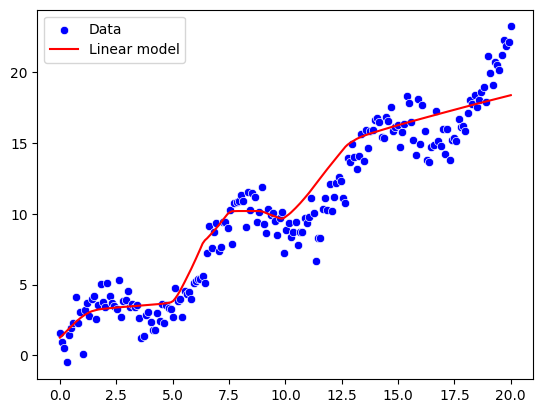

In [16]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')